# Proyecto 1 — DNN para SalePrice


Integrantes:
- Daniel Sanchez
- Felipe Sanchez
- Sergio Paucara

## Etapa 1: Importación de bibliotecas y configuración

In [134]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

tf.__version__

'2.18.0'

## Etapa 2: Importación de la base de datos
El conjunto de datos utilizado está compuesto por 1460 observaciones y 81 variables


In [160]:
train = pd.read_csv('/content/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [83]:
train.shape

(1460, 81)

In [79]:
train.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [82]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


## Etapa 3: Limpieza de la base de datos

Para escalar nuestros datos, utilizaremos la función MinMaxScaler para transformar los valores numericos en un rango de 0 a 1

In [161]:
# Cargar datos numericos y eliminar 'Id'
train = train.select_dtypes(include='number').drop(columns='Id', errors='ignore')

In [165]:
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


<Axes: >

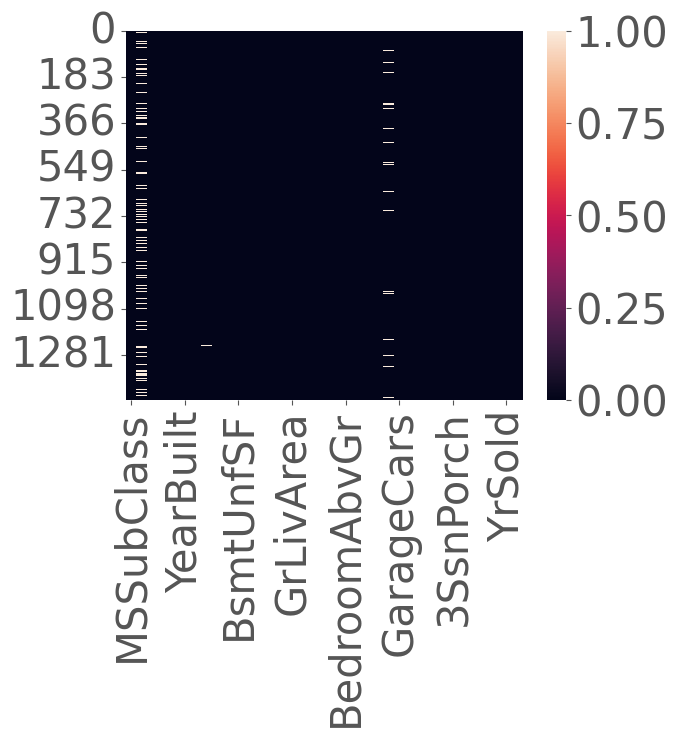

In [164]:
import seaborn as sns
sns.heatmap(train.isnull())

In [87]:
train.fillna(0, inplace=True)

In [88]:
train.shape

(1460, 37)

In [90]:
# Separar características y etiqueta
FEATURES = train.columns.drop('SalePrice')
LABEL = 'SalePrice'

In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = train[FEATURES]
y = train[[LABEL]]

# Escalar caracteristicas
scaler_X = MinMaxScaler()
X_scaled = pd.DataFrame(scaler_X.fit_transform(X), columns=FEATURES)

# Escalar etiqueta
scaler_y = MinMaxScaler()
y_scaled = pd.DataFrame(scaler_y.fit_transform(y), columns=[LABEL])

train_scaled = pd.concat([X_scaled, y_scaled], axis=1)

In [169]:
train['MSSubClass'].value_counts()

,count
MSSubClass,
20,536
60,299
50,144
120,87
30,69
160,63
70,60
80,58
90,52


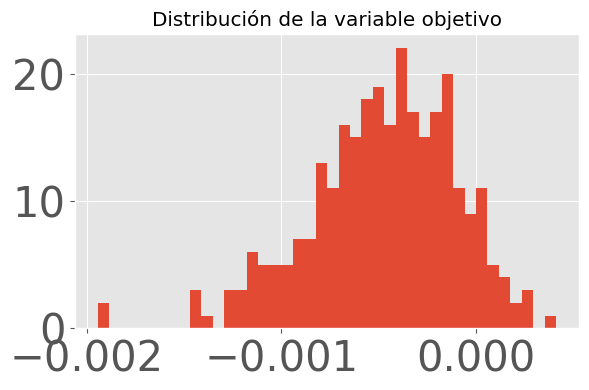

In [168]:
plt.figure(figsize=(6,4))
plt.hist(y, bins=40)
plt.title("Distribución de la variable objetivo")
plt.tight_layout();
plt.show()

In [97]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [100]:
x_train.shape

(1168, 36)

## Etapa 4: Construcción y entrenamiento del modelo

In [101]:
# del model

In [108]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(200, input_dim=36, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

model.compile(
    optimizer='Adam',
    loss="mse",
    metrics=["mae"]
)

In [103]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 200)            │         7,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,851 (132.23 KB)

 Trainable params: 33,851 (132.23 KB)

 Non-trainable params: 0 (0.00 B)

In [135]:
epochs_hist = model.fit(
    x_train, y_train,
    epochs=200,
    batch_size=10,
    validation_split=0.01)

Epoch 1/200
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0217 - mae: 0.1072 - val_loss: 0.0016 - val_mae: 0.0336
Epoch 2/200
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0036 - mae: 0.0398 - val_loss: 0.0017 - val_mae: 0.0329
Epoch 3/200
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0025 - mae: 0.0326 - val_loss: 0.0016 - val_mae: 0.0328
Epoch 4/200
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026 - mae: 0.0331 - val_loss: 0.0011 - val_mae: 0.0267
Epoch 5/200
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023 - mae: 0.0291 - val_loss: 0.0011 - val_mae: 0.0272
Epoch 6/200
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020 - mae: 0.0281 - val_loss: 0.0037 - val_mae: 0.0529
Epoch 7/200
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024 - mae: 0.0338 - val_loss: 0.0016 - val_mae: 0.0305
Epoch 8/200
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0035 - mae: 0.0351 - val_loss: 7.9770e-04 - val_mae: 0.0228
Epoch 9/200
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 

## Etapa 5: Validacion

In [105]:
epochs_hist.history.keys()

dict_keys(['accuracy', 'loss', 'mae', 'val_accuracy', 'val_loss', 'val_mae'])

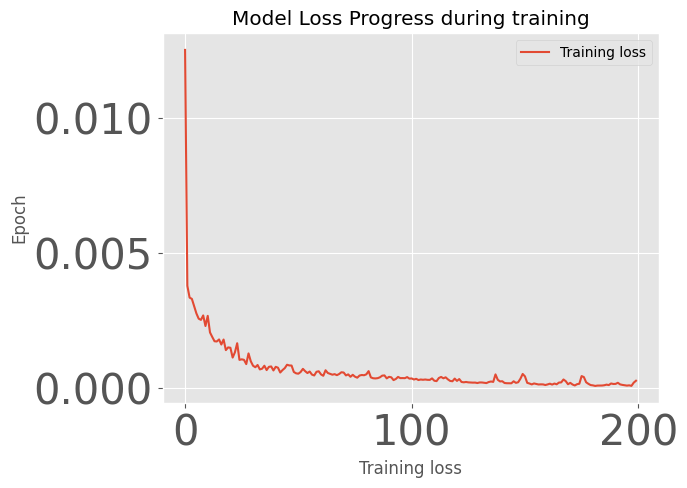

In [106]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress during training')
plt.ylabel('Epoch')
plt.xlabel('Training loss')
plt.legend(['Training loss'])

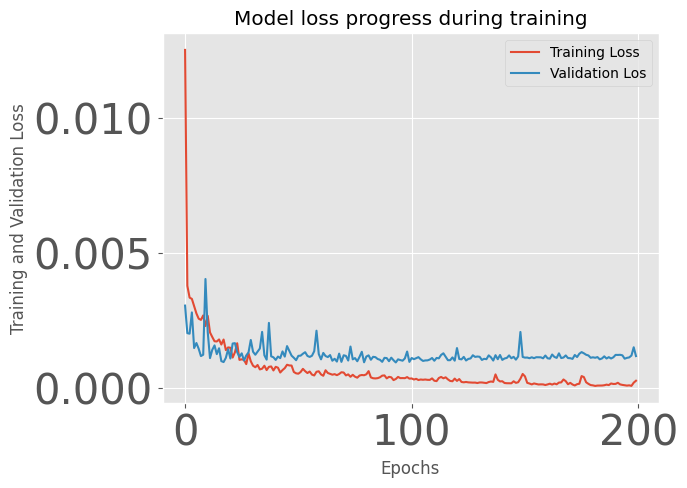

In [109]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model loss progress during training')
plt.xlabel('Epochs')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Los'])

In [151]:
y_predict = model.predict(x_test)
y_predict

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[ 0.14080495],
       [ 0.36833823],
       [ 0.10071986],
       [ 0.21755594],
       [ 0.39627862],
       [ 0.07761009],
       [ 0.22691855],
       [ 0.15232661],
       [ 0.08891754],
       [ 0.14846681],
       [ 0.09121315],
       [ 0.11694736],
       [ 0.08620706],
       [ 0.22952276],
       [ 0.19415872],
       [ 0.13011071],
       [ 0.20217986],
       [ 0.11626107],
       [ 0.09816441],
       [ 0.2559992 ],
       [ 0.18902563],
       [ 0.24067378],
       [ 0.22079259],
       [ 0.13818283],
       [ 0.20806238],
       [ 0.15311478],
       [ 0.19329026],
       [ 0.07247105],
       [ 0.18902245],
       [ 0.19059995],
       [ 0.09576717],
       [ 0.32381266],
       [ 0.19463563],
       [ 0.11229971],
       [ 0.27438384],
       [ 0.1569293 ],
       [ 0.16650203],
       [ 0.21928443],
       [ 0.35864273],
       [ 0.10569115],
       [ 0.12044776],
       [ 0.2632233 ],
       [ 0.12068948],
       [ 0.50377977],
       [ 0.10589068],
       [ 0

In [159]:
k = x_test.shape[1]
n = len(x_test)
print(k, n)

36 292


In [158]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_test_flat = y_test.to_numpy().ravel()
y_predict_flat = np.array(y_predict).ravel()

mae = mean_absolute_error(y_test_flat, y_predict_flat)
mse = mean_squared_error(y_test_flat, y_predict_flat)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_flat, y_predict_flat)
adf_r2 = 1 - ((1-r2)*(n-1)/(n-k-1))

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")
print(f'ADF_R2\t: {adf_r2}')


MAE: 0.02914258322179661
MSE: 0.0022102687296328733
RMSE: 0.04701349518630659
R²: 0.8505772011146651
ADF_R2	: 0.8294822177426178


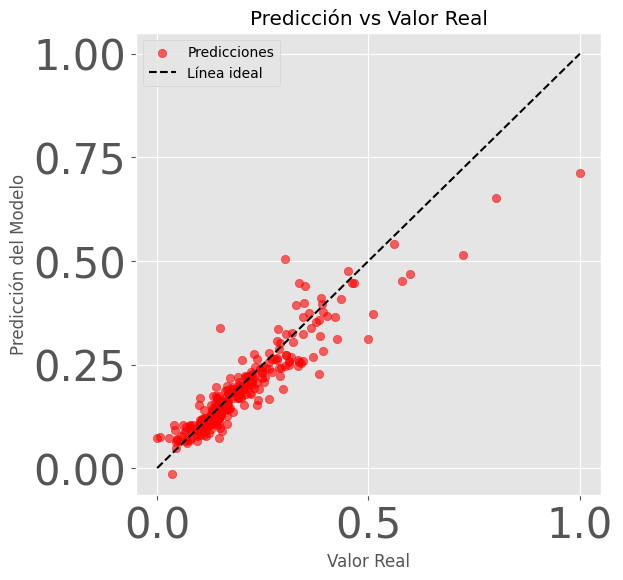

In [157]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test_flat, y_predict_flat, color='red', alpha=0.6, label='Predicciones')
plt.plot([min(y_test_flat), max(y_test_flat)],
         [min(y_test_flat), max(y_test_flat)], 'k--', label='Línea ideal')
plt.xlabel('Valor Real')
plt.ylabel('Predicción del Modelo')
plt.title('Predicción vs Valor Real')
plt.legend()
plt.grid(True)
plt.show()

In [118]:
model.evaluate(x_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0537 - mae: 0.1992  


[0.054979175329208374, 0.20036670565605164]

## Etapa 6: Comparacion del modelo con RandomForest

In [149]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Entrenar modelo de regresión tradicional
rf_reg = RandomForestRegressor(n_estimators=300, random_state=42)
rf_reg.fit(x_train, y_train)
y_pred_rf = rf_reg.predict(x_test)

# Evaluar
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print('Evaluación del modelo Random Forest (Regresión):')
print(f"MAE: {mae_rf:.3f}")
print(f"MSE: {mse_rf:.3f}")
print(f"RMSE: {rmse_rf:.3f}")
print(f"R²: {r2_rf:.3f}")

# Comparación
print("\nComparación de modelos:")
print(f"MAE   -> DNN: {mae:.3f} | RF: {mae_rf:.3f}")
print(f"RMSE  -> DNN: {rmse:.3f} | RF: {rmse_rf:.3f}")

Evaluación del modelo Random Forest (Regresión):
MAE: 0.025
MSE: 0.002
RMSE: 0.040
R²: 0.890

Comparación de modelos:
MAE   -> DNN: 0.029 | RF: 0.025
RMSE  -> DNN: 0.047 | RF: 0.040
